In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI Coursework/train.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [ ]:
columns = df.columns

In [ ]:
df.isnull().sum()

,0
age,0
workclass,2498
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2506
relationship,0
race,0
gender,0


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [ ]:
unique = df. nunique()
print("Unique values Count:\n", unique)

Unique values Count:
 age                   74
workclass              8
fnlwgt             26646
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         122
capital-loss          97
hours-per-week        94
native-country        41
income_>50K            2
dtype: int64


In [ ]:
print("Mode:")
print(df.mode().iloc[0])

Mode:
age                                33
workclass                     Private
fnlwgt                         203488
education                     HS-grad
educational-num                     9
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race                            White
gender                           Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country          United-States
income_>50K                         0
Name: 0, dtype: object


In [ ]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64


In [ ]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = [col for col in  num_columns if col.lower() != 'id']
num_columns

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_>50K']

In [ ]:
sns.set(style="darkgrid")

<ipython-input-17-161ac07e78e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["income_>50K"], y=df["hours-per-week"], palette='Set2')


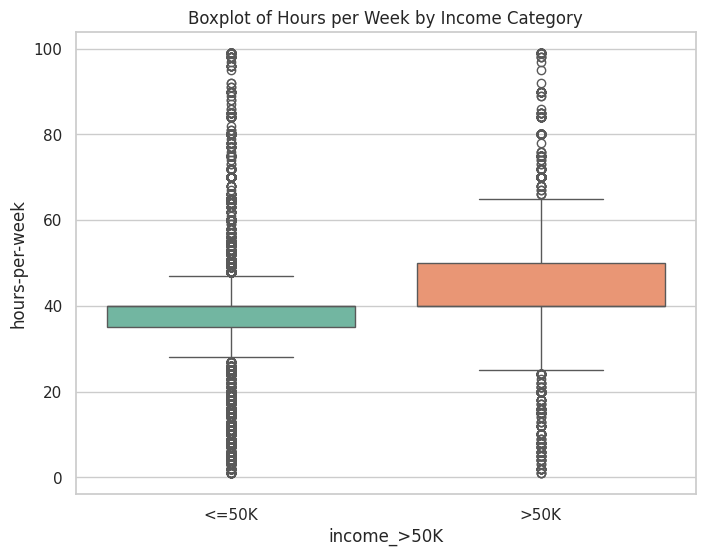

In [ ]:
# Box Plot of Hours-per-week By Income Category
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x=df["income_>50K"], y=df["hours-per-week"], palette='Set2')
plt.title("Boxplot of Hours per Week by Income Category")
plt.xticks(ticks=[0, 1], labels=["<=50K", ">50K"])
plt.show()

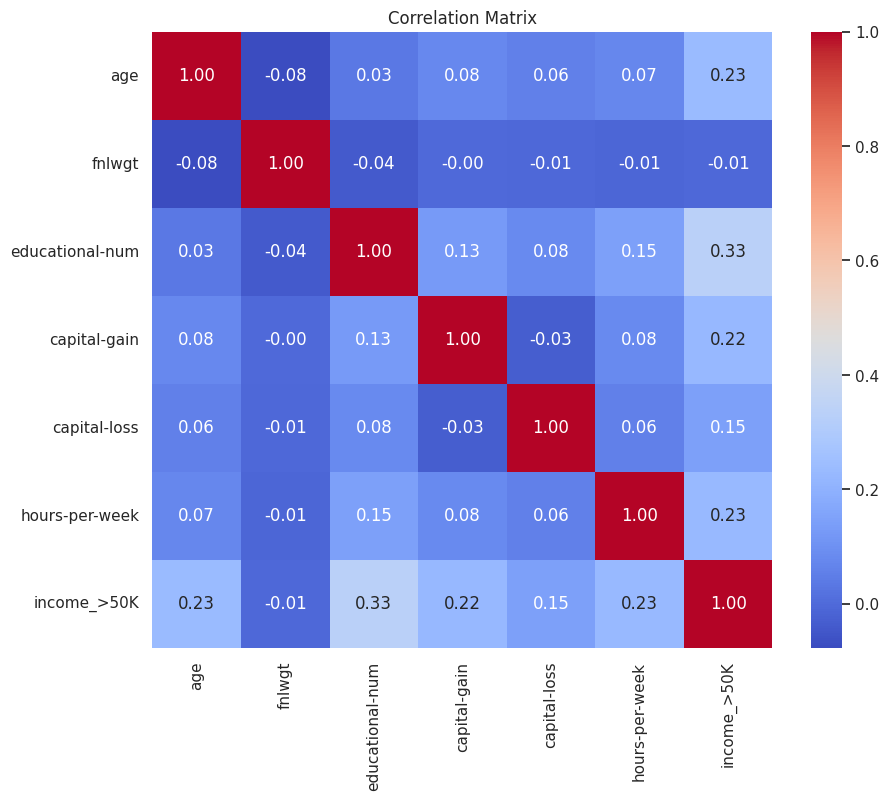

In [ ]:
num_data= df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Feature and Target
X = df[['age', 'gender', 'race', 'education', 'workclass', 'occupation', 'hours-per-week', 'capital-gain', 'capital-loss']]
y = df['income_>50K']

#Drop rows with NaN in features
X = X.dropna()
y = y[X.index] # Ensuring to match y with filtered X

X = pd.get_dummies(X, drop_first = True) #Converting categorical variable into dummy variable

#Normalizing the features for better performance
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

binary_filter = y.isin([0, 1])
X = X[binary_filter]
y = y[binary_filter]

In [ ]:
# Logistic Regression from Scratch

# Intialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0

# Sigmoid Function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Cost function and gradient computation
def compute_cost_and_gradient(X, y, weights, bias):
  m = X.shape[0]
  z = np.dot(X, weights) + bias
  predictions = sigmoid(z)

  # Cost: Binary cross-entropy
  cost = -np.mean(y * np.log(predictions) + (1-y) * np.log(1 - predictions))

  # Gradients
  dw = np.dot(X.T, (predictions - y)) / m
  db = np.mean(predictions - y)

  return cost, dw, db

# Gradient descent optimization
def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
  for i in range(num_iterations):
    cost, dw, db = compute_cost_and_gradient(X, y, weights, bias)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Print cost every 100 iterations for debugging
    if i % 100 == 0:
      print(f"Iteration {i}: Cost {cost}")
  return weights, bias

# Predict labels using the trained model
def predict(X, weights, bias):
  z = np.dot(X, weights) + bias
  probabilities = sigmoid(z)
  return (probabilities >= 0.5).astype(int) # Threshold at 0.5

In [ ]:
# Splitting the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training the Logistic Regression model from scratch
learning_rate = 0.01
num_iterations = 1000

#Train using gradient descent
trained_weights, trained_bias = gradient_descent(X_train.values, y_train.values, weights, bias, learning_rate, num_iterations)

#Predict on training and test sets
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

#Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  print(f"\n{model_name} Evaluation:")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 Score: {f1:.2f}\n")

# Evaluate the scratch Logistic Regression model
print("Logistic Regression from Scratch:")
evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")

Iteration 0: Cost 0.6931471805599453
Iteration 100: Cost 0.5792315488199015
Iteration 200: Cost 0.5221032360612776
Iteration 300: Cost 0.4886318763797185
Iteration 400: Cost 0.4669850563293736
Iteration 500: Cost 0.45206101544852306
Iteration 600: Cost 0.4412973693387461
Iteration 700: Cost 0.43326278434952165
Iteration 800: Cost 0.427096456219412
Iteration 900: Cost 0.42225241529116814
Logistic Regression from Scratch:

Train Set Evaluation:
Accuracy: 0.71
Precision: 0.46
Recall: 0.84
F1 Score: 0.59


Test Set Evaluation:
Accuracy: 0.70
Precision: 0.45
Recall: 0.84
F1 Score: 0.59



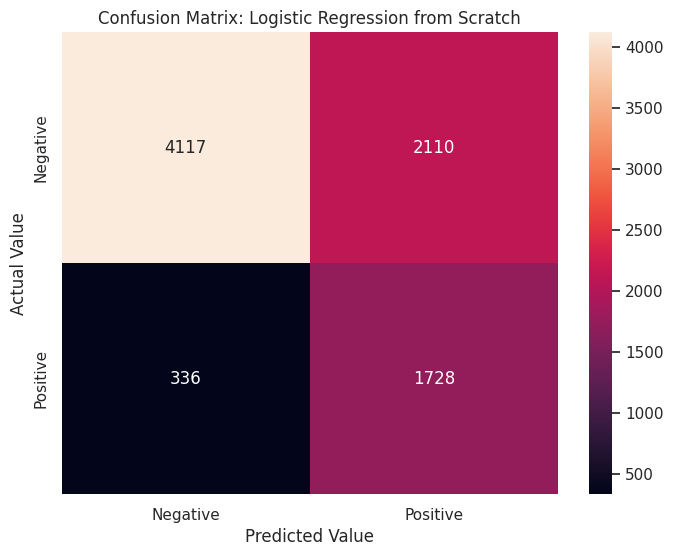

In [ ]:
# CONFUSION MATRIX FOR SCRATCH LOGISTIC REGRESSION
from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d',  xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Label & Title
plt.title("Confusion Matrix: Logistic Regression from Scratch")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()

In [ ]:
# MODEL no. 1 - DECISION TREE

from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.7985
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6227
           1       0.60      0.55      0.58      2064

    accuracy                           0.80      8291
   macro avg       0.73      0.72      0.72      8291
weighted avg       0.79      0.80      0.80      8291



In [ ]:
# MODEL no. 2 - RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.8181
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6227
           1       0.66      0.56      0.60      2064

    accuracy                           0.82      8291
   macro avg       0.76      0.73      0.74      8291
weighted avg       0.81      0.82      0.81      8291



In [ ]:
# Model Comparison Output

# Model 1 - DECISION TREE
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Model 2 - RANDOM FOREST
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Evaluating which model performs better based on Accuracy and F1-Score
# You can also compare precision and recall if needed.
if accuracy_dt > accuracy_rf:
  print("Decision Tree performed better based on accuracy.")
else:
  print("Random Forest performed better based on accuracy.")

Decision Tree Accuracy: 0.7985
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6227
           1       0.60      0.55      0.58      2064

    accuracy                           0.80      8291
   macro avg       0.73      0.72      0.72      8291
weighted avg       0.79      0.80      0.80      8291

Random Forest Classifier Accuracy: 0.8181
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6227
           1       0.66      0.56      0.60      2064

    accuracy                           0.82      8291
   macro avg       0.76      0.73      0.74      8291
weighted avg       0.81      0.82      0.81      8291

Random Forest performed better based on accuracy.


Classification Model Performance Comparison
           Model  Accuracy
0  Decision Tree  0.798456
1  Random Forest  0.818116


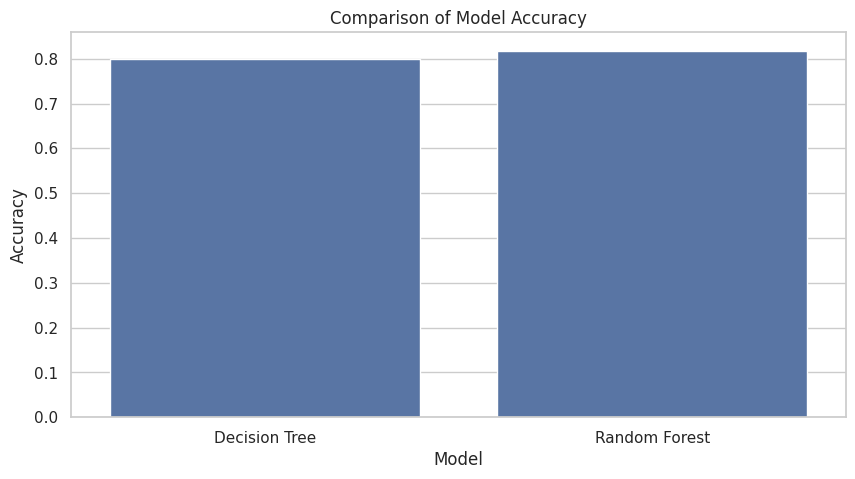

In [ ]:
# Conclusion: Comparing Model Performance
results = {
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_dt, accuracy_rf],
}

results_df = pd.DataFrame(results)
print("Classification Model Performance Comparison")
print(results_df)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Comparison of Model Accuracy")
plt.show()

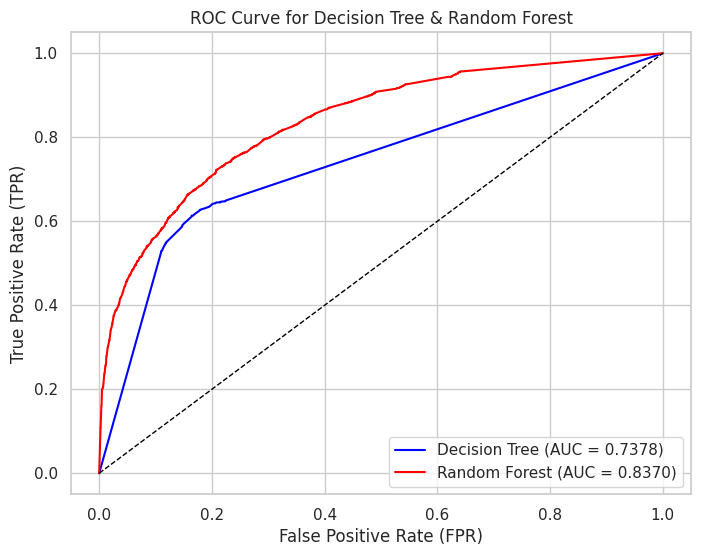

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities for both models
y_prob_dt = dt_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score for Decision Tree
fpr_dt, tpr_dt, _= roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Compute ROC curve and AUC score for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label = f'Decision Tree (AUC = {auc_dt:.4f})', color = 'blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', color = 'red' )

# Plot random baseline (no skill classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color = 'black', lw = 1)

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Decision Tree & Random Forest")
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Model 1 - Decision Tree Hyperparameter Tuning

# Defining the hyperparameters to tune for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perom GridSearch with Cross-Validation for Decision Tree
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy', n_jobs=1)
grid_search_dt.fit(X_train, y_train)

# Best Hyperparameters for Decision Tree
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# Cross-Validation Score for Decision Tree with best parameters
dt_cv_scores = cross_val_score(grid_search_dt.best_estimator_, X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_cv_scores.mean():.4f}")

Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Cross-Validation Accuracy: 0.8392


In [ ]:
# Model 2 - Random Forest Hyperparameter Tuning

# Define the hyperparameters to tune for Random Forest
param_grid_rf = {
    'n_estimators': [10],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Perform Grid Search with Cross-Validation for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=1)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Cross-Validation Score for Random Forest with best parameters
rf_cv_scores = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f}")

Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Random Forest Cross-Validation Accuracy: 0.8352


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection for Decision Tree

# Selecting the best 5 features
select_k_best_dt = SelectKBest(f_classif, k=5)
X_train_selected_dt = select_k_best_dt.fit_transform(X_train, y_train)
X_test_selected_dt = select_k_best_dt.transform(X_test)

# Printing the selected features indices and the feature scores
print("Selected Features for Decision Tree:")
selected_feature_dt = select_k_best_dt.get_support(indices=True)
print("Feature indices:", selected_feature_dt)
print("Feature scores:", select_k_best_dt.scores_)

# Training the Decision Tree model on the selected Features
dt_selected = DecisionTreeClassifier()
dt_selected.fit(X_train_selected_dt, y_train)

# Evaluating the model on the test set
y_pred_selected_dt = dt_selected.predict(X_test_selected_dt)
accuray_selected_dt = accuracy_score(y_test, y_pred_selected_dt)
print(f"Decision Tree Accuracy with Selected Features Accuracy: {accuray_selected_dt:.4f}")

Selected Features for Decision Tree:
Feature indices: [ 0  1  2  4 32]
Feature scores: [2.07827915e+03 1.81064145e+03 1.73042988e+03 7.18610347e+02
 1.63782421e+03 7.57346518e+00 2.48114506e+02 2.80915859e+01
 2.16057044e+02 2.53251433e+02 5.77355571e+01 4.24716063e+01
 7.66464885e+01 1.12907383e+02 1.00026996e+02 2.74498629e+00
 2.06873289e+00 1.04878920e+03 4.91198640e+02 6.28873427e+02
 1.01932630e+03 1.68371187e+01 8.01484976e+02 1.09417808e+02
 3.86537327e+01 5.12471146e+02 6.87981651e+02 1.37026397e+01
 3.89726564e+00 8.27887010e-01 1.24256223e+00 8.50044510e+00
 1.52187934e+03 1.00650503e+02 2.70860760e+02 2.07981470e+02
 9.38975373e+02 5.21573738e+01 1.13225177e+03 1.36031512e+01
 1.59370275e+01 1.07318866e+01 3.00313515e+01]
Decision Tree Accuracy with Selected Features Accuracy: 0.7998


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Feature Selection for Random Forest
# Fit a Random Forest Model to evaluate feature importance
rf_model.fit(X_train, y_train)

# Select the top 5 most important features
select_from_model_rf = SelectFromModel(rf_model, max_features=5, prefit=True)
X_train_selected_rf = select_from_model_rf.transform(X_train)
X_test_selected_rf = select_from_model_rf.transform(X_test)

# Printing the selected features indices
print("Selected Features for Random Forest:")
selected_feature_rf = select_from_model_rf.get_support(indices=True)
print("Feature indices:", selected_feature_rf)

# Train a Random Forest model on the selected Features
rf_selected = RandomForestClassifier(n_estimators=100)
rf_selected.fit(X_train_selected_rf, y_train)

# Evaluate the model on the test set
y_pred_selected_rf = rf_selected.predict(X_test_selected_rf)
accuracy_selected_rf = accuracy_score(y_test, y_pred_selected_rf)
print(f"Random Forest Accuracy with Selected Features: {accuracy_selected_rf:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features for Random Forest:
Feature indices: [0 1 2 3 4]
Random Forest Accuracy with Selected Features: 0.8115


In [ ]:
# Final Model For Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Final Model For Random Forest

# Using best hyperparameters from GridSearchCV
best_params = {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}

# Train Random Forest with Best Hyperparameters
rf_final = RandomForestClassifier(
     n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],  # Include max_features
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],  # Include bootstrap
    random_state=42
)

# Using Top 3 selected features
selected_feature_indices = select_from_model_rf.get_support(indices=True)
X_train_selected_rf = X_train.iloc[:, selected_feature_indices]
X_test_selected_rf = X_test.iloc[:, selected_feature_indices]

# Fit the model
rf_final.fit(X_train_selected_rf, y_train)

# Make predictions on the test data
y_pred_rf_final = rf_final.predict(X_test_selected_rf)

# Calculate metrics
accuracy_rf_final = accuracy_score(y_test, y_pred_rf_final)
precision_rf_final = precision_score(y_test, y_pred_rf_final, average='weighted')
recall_rf_final = recall_score(y_test, y_pred_rf_final, average='weighted')
f1_rf_final = f1_score(y_test, y_pred_rf_final, average='weighted')

# Compare with previous performance
print(f"Random Forest Accuracy with Selected Features: {accuracy_selected_rf:.4f}")
print(f"Final Random Forest Accuracy: {accuracy_rf_final:.4f}")

# Print additional metrics
print(f"Final Random Forest Precision: {precision_rf_final:.4f}")
print(f"Final Random Forest Recall: {recall_rf_final:.4f}")
print(f"Final Random Forest F1 Score: {f1_rf_final:.4f}")

# Which model did better?
if accuracy_rf_final > accuracy_selected_rf:
    print("Final Random Forest performed better after using the best hyperparameters and selected Features.")
else:
    print("Model performance did not improve after using the best hyperparameters and selected Features.")

Random Forest Accuracy with Selected Features: 0.8115
Final Random Forest Accuracy: 0.8185
Final Random Forest Precision: 0.8179
Final Random Forest Recall: 0.8185
Final Random Forest F1 Score: 0.7901
Final Random Forest performed better after using the best hyperparameters and selected Features.


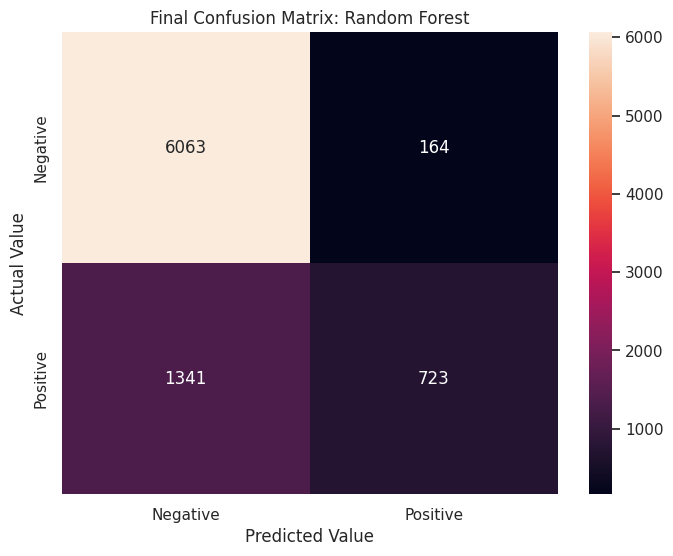

In [ ]:
# CONFUSION MATRIX FOR FINAL MODEL
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred_rf_final)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Final Confusion Matrix: Random Forest")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()